Weibull distribution
---

CDF(x) = 1 − e−(x/λ)^k

The Weibull distribution is related to a number of other probability distributions; 

in particular, it interpolates between the exponential distribution (k = 1) and the Rayleigh distribution (k = 2 and {\displaystyle \lambda ={\sqrt {2}}\sigma } \lambda = \sqrt{2}\sigma).

**the Weibull distribution gives a distribution for which the failure rate is proportional to a power of time**



In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, os

Use numpy library to generate random samples from any distribution

In [15]:
np.random.weibull(a=1.5,size=10)


array([0.57099382, 0.58215757, 0.48862669, 0.58182404, 1.55195376,
       1.51645969, 0.90281909, 0.93900832, 0.61500707, 0.86034761])

Text(0.5,1,'Weibull Distribution')

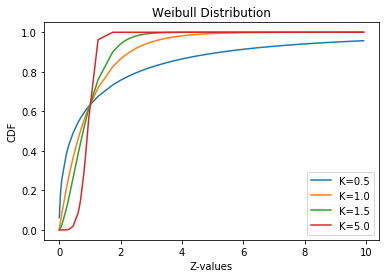

In [125]:
z_values = sorted(10*np.random.rand(100))
lam = 1
k = 0.5
def cdf_weibull(values,lam,k):
    return [1-np.exp(-(val/lam)**k) for val in values]

cdf0 = cdf_weibull(z_values,1,0.5)
cdf1 = cdf_weibull(z_values,1,1)
cdf2 = cdf_weibull(z_values,1,1.5)
cdf3 = cdf_weibull(z_values,1,5)

plt.plot(z_values,cdf0,label='K=0.5')
plt.plot(z_values,cdf1,label='K=1.0')
plt.plot(z_values,cdf2,label='K=1.5')
plt.plot(z_values,cdf3,label='K=5.0')
plt.legend()
plt.xlabel('Z-values')
plt.ylabel('CDF')
plt.title('Weibull Distribution')

1. A value of k<1 indicates that the failure rate decreases over time (Lindy effect).
2. A value of k=1 indicates that the failure rate is constant over time. This might suggest random external events are causing mortality, or failure. The Weibull distribution reduces to an exponential distribution;
3. A value of k>1 indicates that the failure rate increases with time. This happens if there is an "aging" process, or parts that are more likely to fail as time goes on

In [126]:
def eval_cdf(value,series):
    count =0
    for x in series:
        if x <= value:
            count += 1
    return count/len(series)

def compute_cdf(series):
    x = sorted(series)
    y = []
    for value in x:
        y.append(eval_cdf(value,x))
    return x,y

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


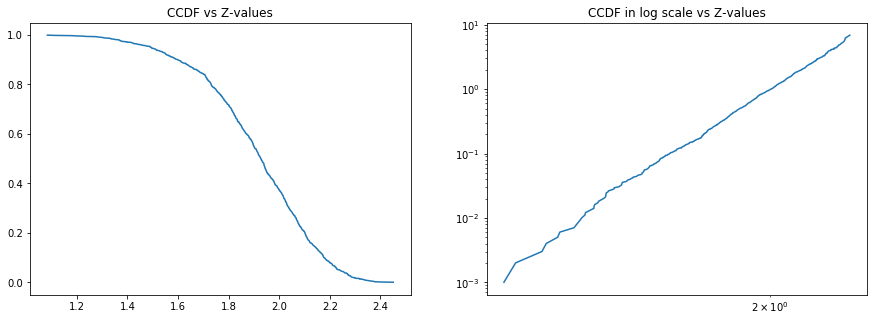

In [142]:
# Transformation of weibull distribution
import random
weibull = sorted([random.weibullvariate(2, 10) for _ in range(1000)])
weibull,cdf_random = compute_cdf(weibull)

ccdf = [1-c for c in cdf_random]
log_ccdf = -1*np.log(ccdf)

fig, (ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(15,5)

ax1.plot(weibull,ccdf)
ax1.set_title('CCDF vs Z-values')
ax2.set_title('CCDF in log scale vs Z-values')
ax2.plot(weibull,log_ccdf)
ax2.set_xscale('log')
ax2.set_yscale('log')